# Leopard, Cheetah, Jaguar Classifier

In [1]:
%reload_ext autoreload
%autoreload 2 
%matplotlib inline

## Imports

In [2]:
from fastai import *
from fastai.vision import *
from fastai.widgets import *

## Getting Data

I already had downloaded the images in a previous iteration of this problem. So here I just created my databunch by using the Datablock API. In previous iteration I used factory method of ImageDataBunch.

In [3]:
path = Path('data/LCJ/')
#path.ls()

In [6]:
np.random.seed(42)
data = (ImageList.from_folder(path)
        .filter_by_folder(['Cheetah', 'Leopard', 'Jaguar'])
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .transform(get_transforms(), size=224)
        .databunch()
       .normalize(imagenet_stats))

In [7]:
data.show_batch(size = 3, fig_size = (7,6))

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/opt/anaconda3/lib/python3.7/

KeyboardInterrupt: 

## Train Model 

In [8]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [ ]:
learn.fit_one_cycle(5)

In [ ]:
learn.save('stage-1')

## Finetuning model 

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr = slice(1e-06, 1e-02))


In [ ]:
learn.save('stage-2')

## Cleaning Up Data

Some of the images aren't of the animals we want and the error rate could be attributed to this. First we'll just look at the general top confused, and then proceed to cleaning up our data.

In [ ]:
learn.load('stage-2');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type = DatasetType.Valid)

In [ ]:
ImageCleaner(ds, idxs, path)

Now you use your cleaned data to train the model.

In [4]:
data = (ImageList.from_csv(path, 'cleaned.csv')
        .split_by_rand_pct(0.2)
        .label_from_df()
        .transform(get_transforms(), size = 224)
        .databunch()
        .normalize(imagenet_stats))

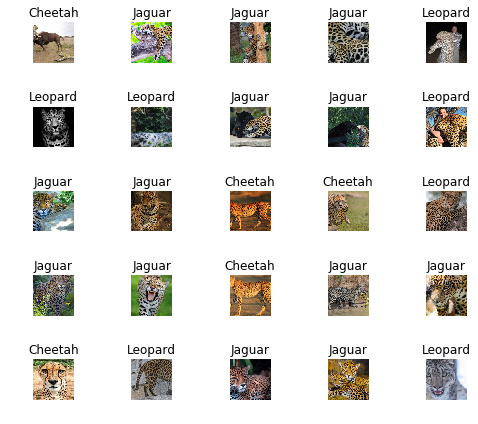

In [5]:
data.show_batch(size=3, figsize=(7,6))

In [6]:
learn =cnn_learner(data, models.resnet34, metrics = error_rate)

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.300849,0.758512,0.409091,00:04
1,0.930892,0.362115,0.090909,00:03
2,0.728495,0.401901,0.090909,00:03
3,0.610374,0.419806,0.090909,00:03


In [8]:
learn.save('stage-3')


## Finetuning pt2

In [9]:
learn.unfreeze()

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


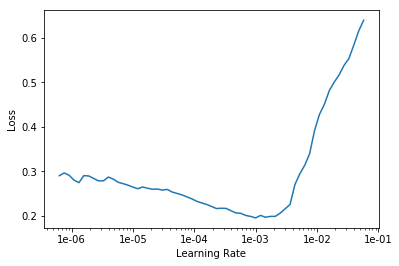

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(4, max_lr = slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.269141,0.443342,0.090909,00:03
1,0.225632,0.628562,0.136364,00:03
2,0.202087,0.524217,0.090909,00:03
3,0.188164,0.484195,0.090909,00:03


In [29]:
learn.save('stage-4')

## Data Cleaning part 2

In [31]:
learn.load('stage-4');

In [33]:
interp = ClassificationInterpretation.from_learner(learn)

In [37]:
ds, idxs = DatasetFormatter().from_toplosses(learn , ds_type = DatasetType.Valid)


In [39]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

## Training yet again

In [13]:
data = (ImageList.from_csv(path, 'cleaned.csv')
                 .split_by_rand_pct(0.2)
                 .label_from_df()
                 .transform(get_transforms(), size = 224)
                 .databunch()
                 .normalize(imagenet_stats))


In [14]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


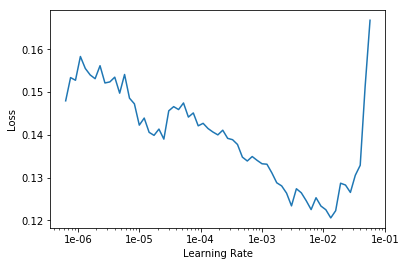

In [15]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(5, slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.142923,0.492197,0.106061,00:03
1,0.122500,0.619181,0.106061,00:03
2,0.130100,0.783379,0.136364,00:03
3,0.132552,0.842267,0.166667,00:03
4,0.130027,0.788136,0.151515,00:03


In [50]:
learn.save('stage-5')

In [53]:
interp = ClassificationInterpretation.from_learner(learn)

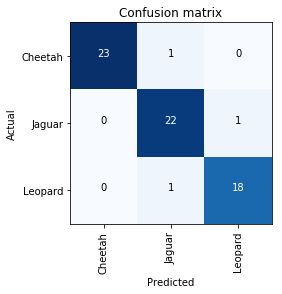

In [58]:
interp.plot_confusion_matrix()

In [59]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(5, slice(2e-5, 1e-4) )

epoch,train_loss,valid_loss,error_rate,time
0,0.087615,0.748112,0.151515,00:03
1,0.092175,0.728026,0.151515,00:03
2,0.102736,0.698083,0.151515,00:03
3,0.089078,0.682694,0.151515,00:03
4,0.095005,0.684821,0.151515,00:03


In [68]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


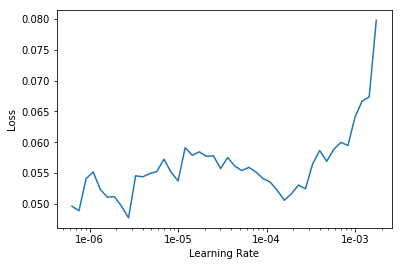

In [69]:
learn.recorder.plot()

In [72]:
learn.save('stage-6')

## Loading back model 

In [19]:
learn.load('stage-6');

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.165148,0.086768,0.030303,00:03
1,0.152119,0.059324,0.030303,00:03
2,0.124516,0.041731,0.030303,00:03
3,0.109850,0.038556,0.015152,00:03


In [21]:
learn.save('stage-7')

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


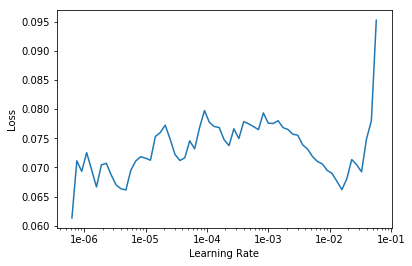

In [28]:
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(4, slice(1e-3,(1e-2)))

epoch,train_loss,valid_loss,error_rate,time
0,0.340584,1.259252,0.106061,00:03
1,0.512220,0.893791,0.075758,00:03
2,0.445100,0.744170,0.075758,00:03
3,0.364699,0.704577,0.075758,00:03


In [40]:
learn.save('stage-8')

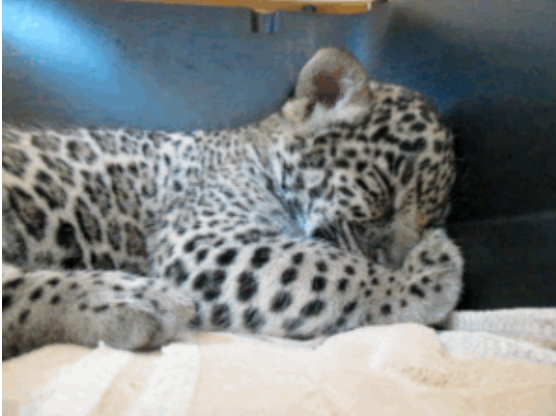

In [42]:
img = open_image(path/'Jaguar'/'Image-1.png')
img

In [47]:
pred_class,pred_idx,ouputs = learn.predict(img)

In [48]:
pred_class

Category Jaguar

In [45]:
learn.export()

In [46]:
learn = load_learner(path)